<a href="https://colab.research.google.com/github/dhrisandamedhi/Retail_store/blob/main/EDA_retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail_store



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [806]:
# Import Libraries
# importing all libraries required in the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import missingno as msno
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet


In [807]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [808]:
# Load Dataset
store_test= pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/store.csv')
store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')

<ipython-input-808-475fb60ce062>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')


#***Analyze Rossmann Store dataset***

### Dataset First View

In [809]:
# Dataset First Look
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


->First 5 Rows of the dataset.

In [810]:
#tail of the dataset
store_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


->Last five rows of the dataset.

### Dataset Rows & Columns count

In [811]:
# Dataset Rows & Columns count
store_train.shape

(1017209, 9)

### Dataset Information

In [812]:
# Dataset Info
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [813]:
# Dataset Duplicate Value Count
store_train.duplicated().sum()


0

#### Missing Values/Null Values

In [814]:
# Missing Values/Null Values Count
store_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

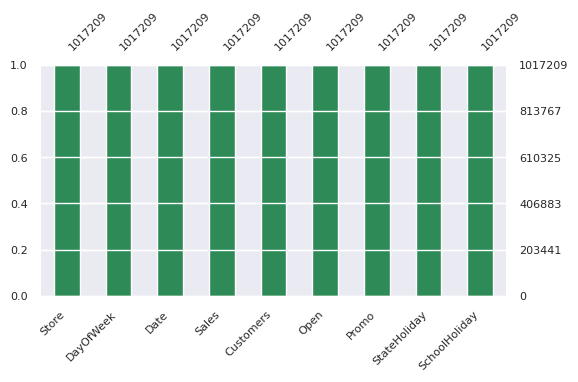

In [815]:
# Visualizing the missing values
msno.bar(store_train, figsize=(6,3), fontsize=8, color="seagreen")


### What did you know about your dataset?

Answer Here

->Dateset has 1017209 rows and 9 columns.

->2 columns are object type and 7 columns are int type.

-> No duplicate value in the dataset.

-> 0 Null value in this dataset.






## ***2. Understanding Your Variables***

In [816]:
# Dataset Columns
# store_train.columns()

In [817]:
# Dataset Describe
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

Answer Here

Store: a unique no is assign to the store.

Dayofweek:number of day in a week .

Date: Date are assign here.It obj type so we need to covert it to date.

Sales: the turnover for any given day

Customer:  the number of customers on a given day

Open:an indicator for whether the store was open: 0 = closed, 1 = open

Promo:indicates whether a store is running a promo on that day

StateHoliday:indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools


### Check Unique Values for each variable.

In [818]:
# Check Unique Values for each variable.

In [819]:
store_train.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [820]:
store_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [821]:
store_train.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [822]:
store_train.Sales.unique()

array([ 5263,  6064,  8314, ...,   660, 17815, 23303])

In [823]:
store_train.Customers.unique()

array([ 555,  625,  821, ..., 3900,   36, 4065])

In [824]:
store_train.Open.unique()

array([1, 0])

In [825]:
store_train.Promo.unique()

array([1, 0])

In [826]:
store_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [827]:
store_train.SchoolHoliday.unique()

array([1, 0])

In [828]:
store_train=store_train.fillna(0)

##Convert Date columns int to datetime

In [829]:
#now convert 
store_train['Date'] = pd.to_datetime(store_train['Date'])


In [830]:
#check first date
store_train['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [831]:
#check last date
store_train['Date'].max()


Timestamp('2015-07-31 00:00:00')

In [832]:
# store_train['SchoolHoliday']=store_train['SchoolHoliday'].apply(int)

###extract date,year,month ,Week of year


In [833]:
#year extarct
store_train['Year'] = store_train['Date'].apply(lambda x: x.year)

In [834]:
#Month extarct
store_train['Month'] = store_train['Date'].apply(lambda x: x.month)

In [835]:
#Day extract
store_train['Day'] = store_train['Date'].apply(lambda x: x.day)

In [836]:
#Week of year extract
store_train['Weekof year'] = store_train['Date'].apply(lambda x: x.weekofyear)

-> extarct date ,month, year ,Week of date from date comumns and store it into another variable namely Day, Month, Year,Weekofyear.

In [837]:
store_train['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

In [838]:
store_train. head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


###What all manipulations have you done and insights you found?

Answer Here.


Date columns convert to datetime

Extract date into day,month,Year,Weekofyear

#Eda On Rossman Dataset

<Axes: xlabel='DayOfWeek', ylabel='count'>

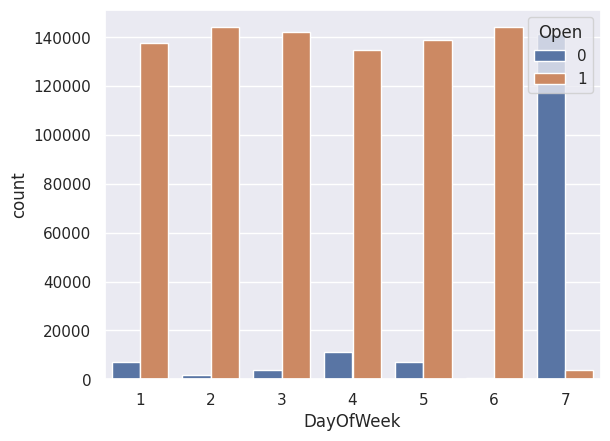

In [839]:
sns.countplot(x='DayOfWeek',hue='Open',data=store_train)

->we can see stores is closed on sunday(7) most of the time.

In [840]:
# Value Counts of SchoolHoliday Column
store_train.SchoolHoliday.value_counts(normalize=True)

0    0.821353
1    0.178647
Name: SchoolHoliday, dtype: float64

->we can see that 18 % is state holiday.

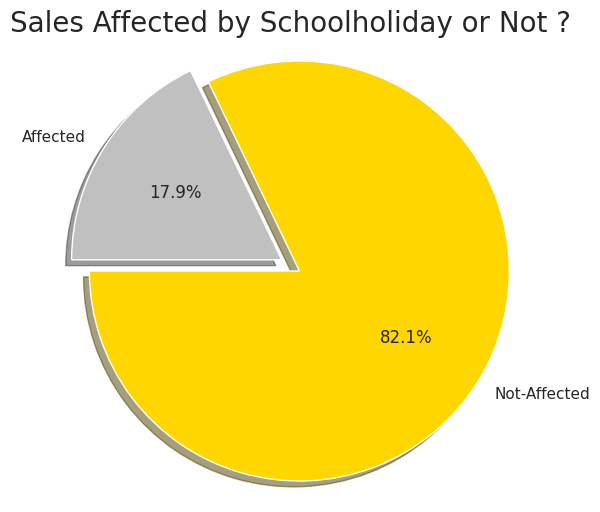

In [841]:
labels = 'Not-Affected' , 'Affected'
sizes = store_train.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

->As we can see in the Piechart  Sales aren't afffected by School Holiday

<Axes: xlabel='Promo', ylabel='Sales'>

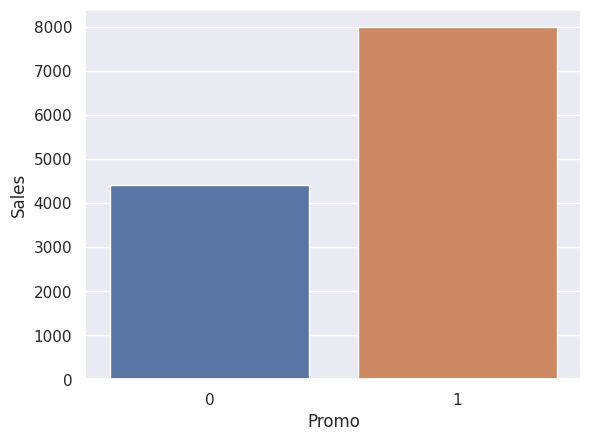

In [842]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(store_train.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

->Sales Are nearly doubled High When Promo is Running

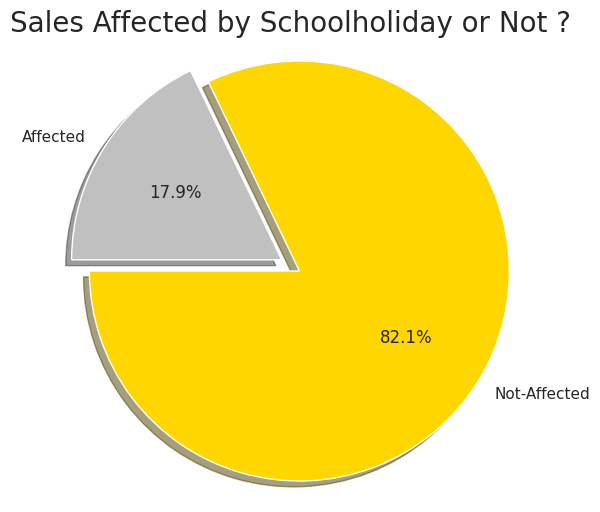

In [843]:
labels = 'Not-Affected' , 'Affected'
sizes = store_train.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [844]:
sns.countplot(x='SchoolHoliday',hue='Sales',data=store_train)

<Axes: xlabel='Year', ylabel='count'>

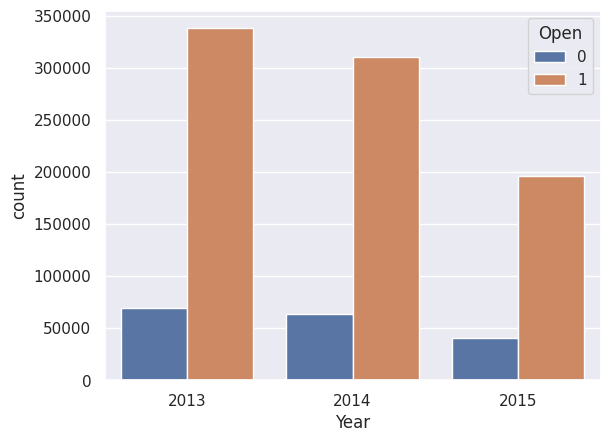

In [845]:
sns.countplot(x='Year',hue='Open',data=store_train)

->2013 highest open 

Q.Which date has highest sales?

Q.Which store has highest Sales?

In [846]:
sns.lineplot(x="Sales",  y = 'Store',data =store_train).set_title("Product Sales per store")

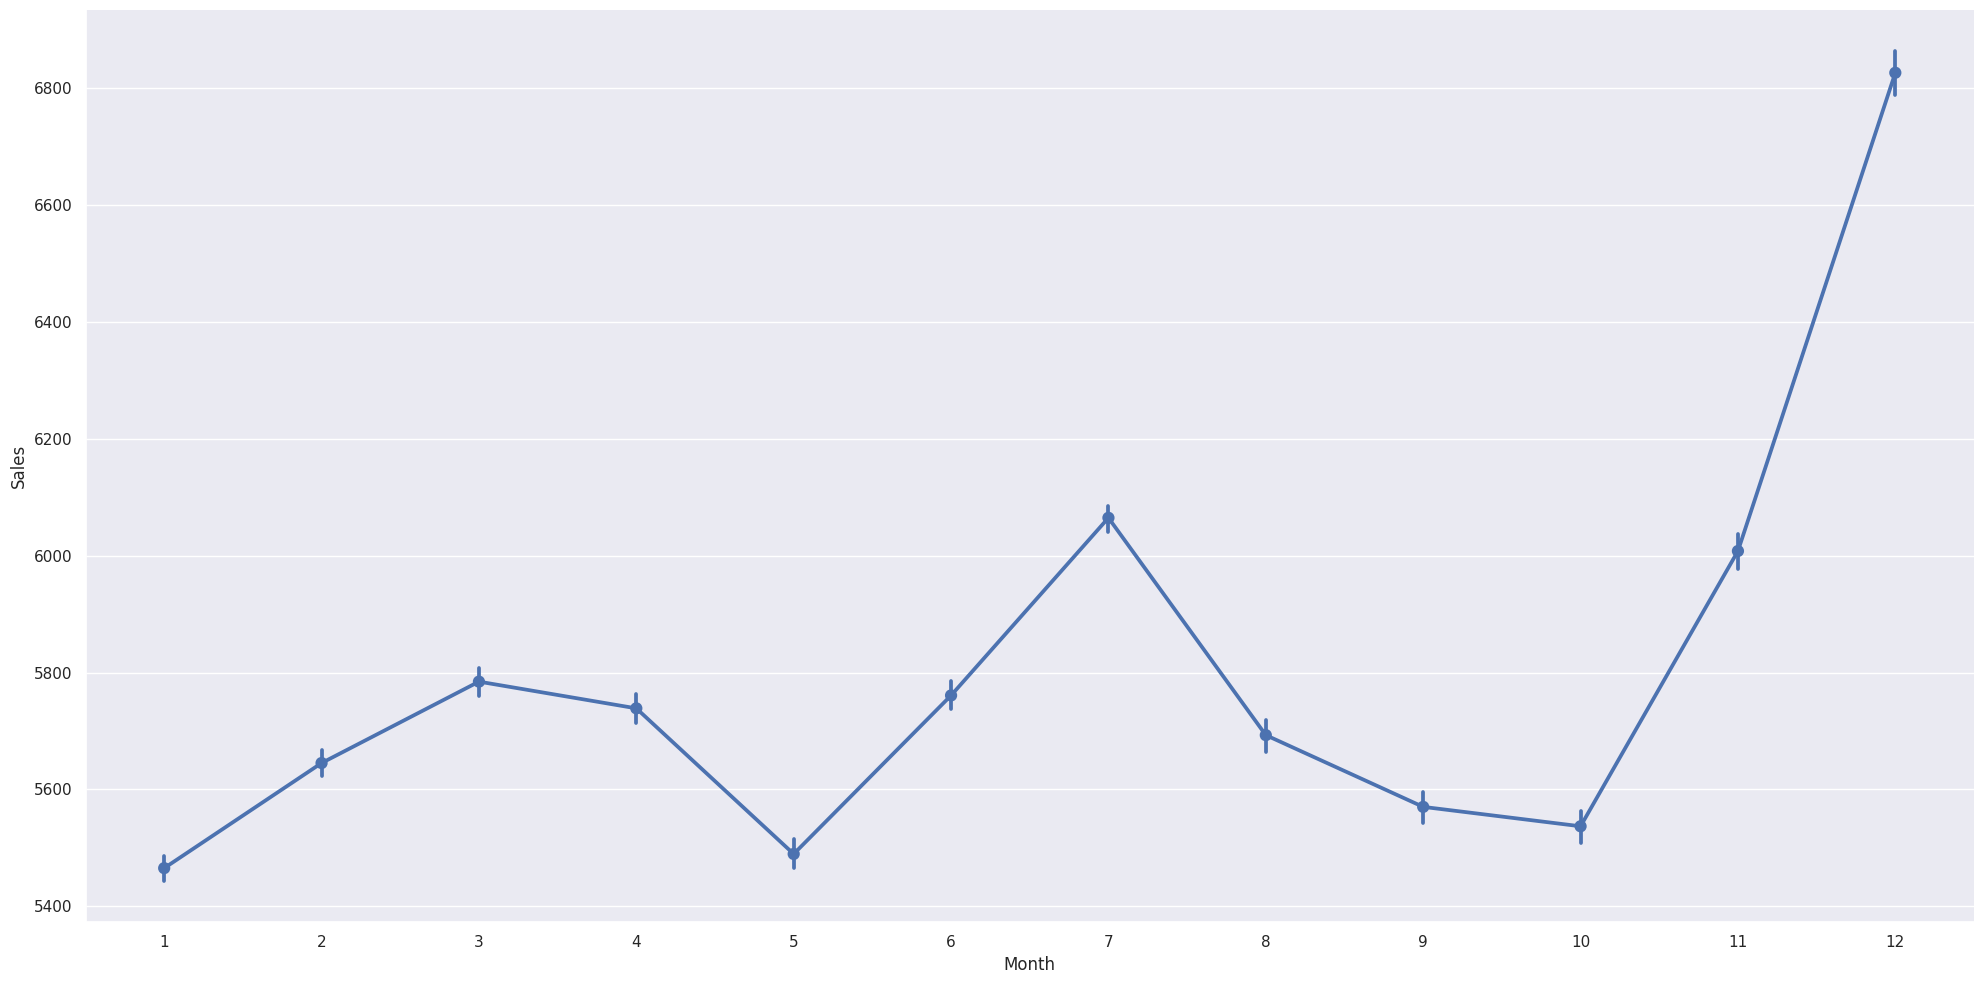

In [847]:
sns.catplot(x="Month" ,y = "Sales" , data=store_train, kind="point", aspect=2,height=10)

->As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.

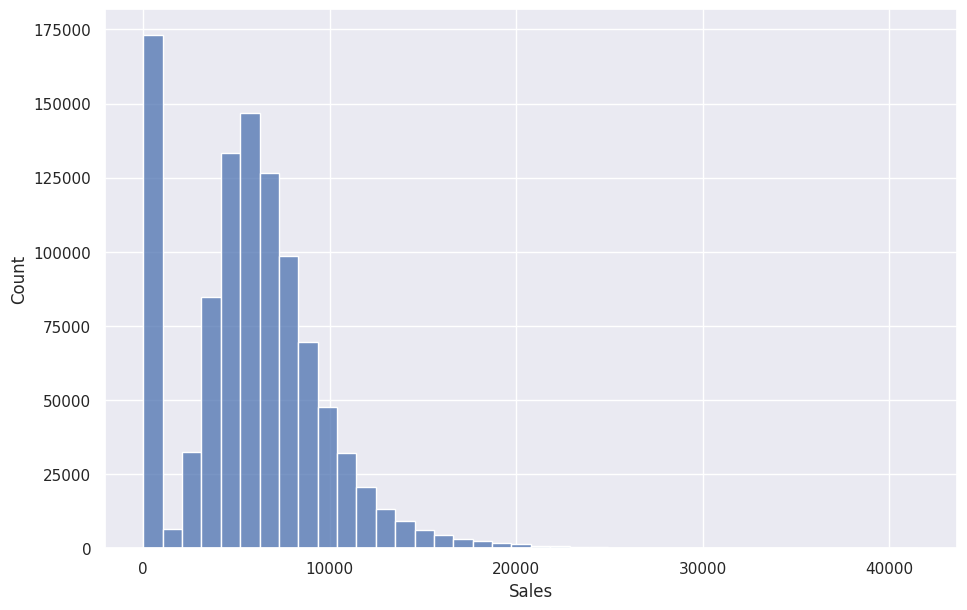

In [848]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(store_train['Sales'], kde = False,bins=40);


->Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

In [849]:
#linear relation between sales and customers
# sns.lmplot(x= 'Sales' , y ='Customers',data=store_train, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

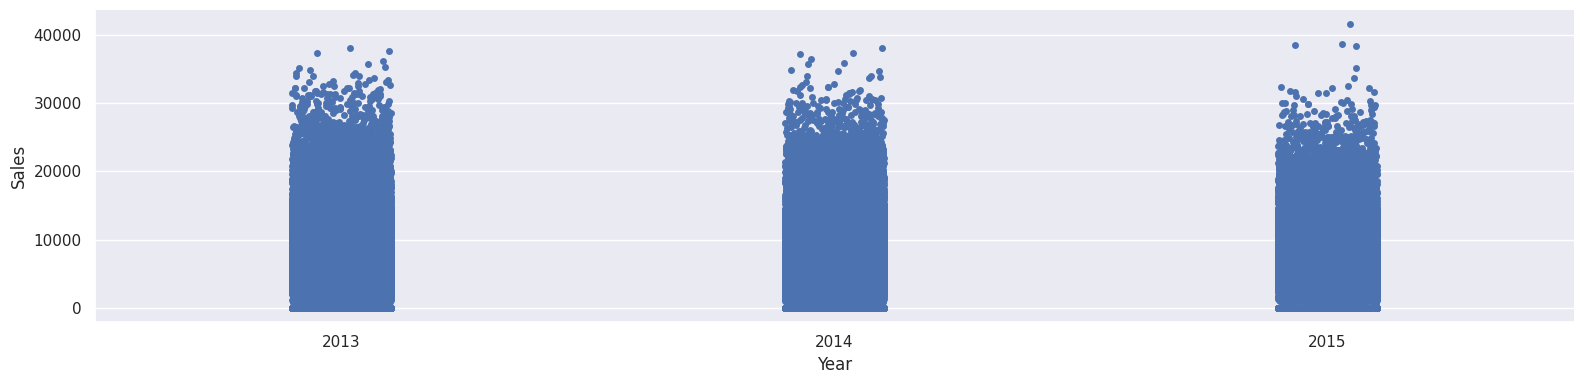

In [850]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=store_train, height=4, aspect=4 );

->->We can see that there is not such significant differences in these 3 years in terms of sales.

In [851]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


#***Analyze the Store dataset***

###Dataset First View

In [852]:
# Dataset First Look
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [853]:
#tail of the dataset
store_test.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


###Dataset Rows & Columns count

In [854]:
#rows and columns count
store_test.shape

(1115, 10)

###Dataset Information

In [855]:
# Dataset Info
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Duplicate Values

In [856]:
# Dataset Duplicate Value Count
store_test.duplicated().sum()

0

###Missing Values/Null Values

In [857]:
# Missing Values/Null Values Count
store_test.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

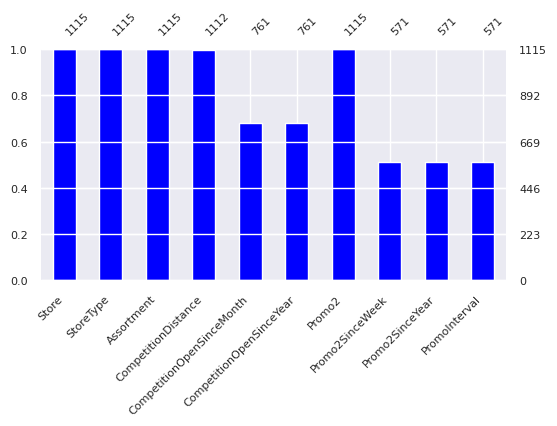

In [858]:
# Visualizing the missing values
msno.bar(store_test, figsize=(6,3), fontsize=8, color="blue")

###What did you know about your dataset?

Answer Here:

->Data set has 1115 rows and 10 columns.

->Almost 6 columns have null value.

->Dataset has 5 float type columns, 2 object types columns and  3 object types columns.

->Need to convert some float to int for accurat observation.

->4 columns  of the dataset which hasn't any null values.


###Understanding Your Variables

In [859]:
# Dataset Columns
# store_test.columns()

In [860]:
# Dataset Describe
store_test.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


###Variables Description

Answer Here

Store- Index value 

Store- Store type is assign here .Here 3 types of unique value i.e. a,b,c,d

Assortment- 3 unique value a,c,b and nan value is 0.

CompetitionDistance: Here distance are define. It has some nall  values.

CompetitionOpenSinceMonth: here months are define ,but nall value is shown.It is float value so need to convert float to date.

CompetitionOpenSinceYear: number of  competition year . but it has some null value and need to remove ' .' from this column.it need to convert float to date.

Promo2:it has two binary  value 1 and 0. and has 1115 rows which means no nall value present in this column.

Promo2SinceWeek: No of promo week,it has null value. It need to covert float to int value.

Promo2SinceYear:Number of promo year , it has null value and nned to convert float to int.

PromoInterval:It has some group of month .it has some null value.

###Check Unique Values for each variable.

In [861]:
#Check Unique Values for each variable.
store_test.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [862]:
store_test.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [863]:
store_test.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [864]:
store_test.CompetitionDistance.unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [865]:
store_test.CompetitionOpenSinceMonth .unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [866]:
store_test.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [867]:
store_test.Promo2.unique()

array([0, 1])

In [868]:
store_test.Promo2SinceWeek  .unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [869]:
store_test.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [870]:
store_test.PromoInterval  .unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [871]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Cleaning

In [872]:
# remove features
store_test = store_test.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [873]:
# replace missing values in CompetitionDistance with median for the store dataset

store_test.CompetitionDistance.fillna(store_test.CompetitionDistance.median(), inplace=True)

In [874]:
#replace 0 with nan
# store_test=store_test.fillna(0)
#replace 0 with nan
# store_test=store_test.fillna(0,inplace=True)


###Convert some float to int

In [875]:
# store_test['CompetitionOpenSinceMonth']=store_test['CompetitionOpenSinceMonth'].apply(int)

In [876]:
# store_test['CompetitionOpenSinceMonth'] = pd.to_datetime(store_test['CompetitionOpenSinceMonth']).dt.month

In [877]:
# store_test['CompetitionOpenSinceYear']=store_test['CompetitionOpenSinceYear'].apply(int)
# store_test['CompetitionOpenSinceYear'] = pd.to_datetime(store_test['CompetitionOpenSinceYear']).dt.year

In [878]:
# store_test['Promo2SinceWeek']=store_test['Promo2SinceWeek'].apply(int)
# store_test['Promo2SinceWeek '] = pd.to_datetime(store_test['Promo2SinceWeek ']).dt.day

In [879]:
# store_test['Promo2SinceYear']=store_test['Promo2SinceYear'].apply(int)
# store_test['Promo2SinceYear'] = pd.to_datetime(store_test['Promo2SinceYear']).dt.year

## 4.Data Wrangling

### Data Wrangling Code

In [880]:
# Write your code to make your dataset analysis ready.
#check outliers
store_test.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1115.000000,1115.000000
mean,558.00000,5396.614350,0.512108
std,322.01708,7654.513635,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,720.000000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6875.000000,1.000000
max,1115.00000,75860.000000,1.000000


In [881]:
#Check outlier 
# columns = ['Store',	'CompetitionDistance',	'CompetitionOpenSinceMonth'	,'CompetitionOpenSinceYear'	,'Promo2','Promo2SinceWeek','Promo2SinceYear']
# n = 1
# plt.figure(figsize=(20,15))

# for column in columns:
#   plt.subplot(4,4,n)
#   n = n+1
#   sns.boxplot(store_train[column])
#   plt.tight_layout()

->see some outliers in compitiors distance

In [929]:
store_test=store_test[store_test['CompetitionDistance']<5000].reset_index(drop=True)

<ipython-input-930-75e57a4360df>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_test.CompetitionDistance)


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

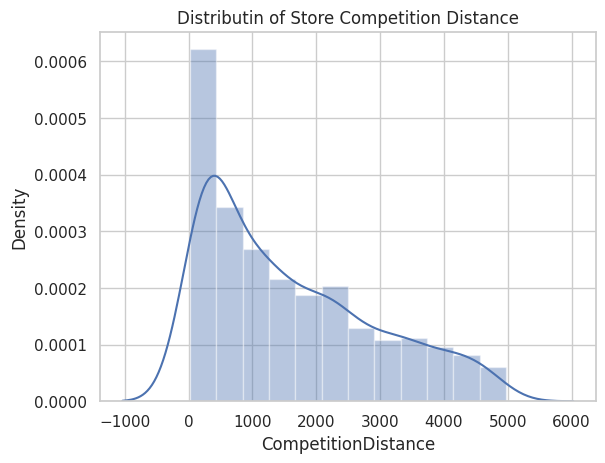

In [930]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_test.CompetitionDistance)
plt.title("Distributin of Store Competition Distance")

In [931]:
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Weekof year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01


->now remove all outlier

### What all manipulations have you done and insights you found?

Answer Here.



 Remove all null value with 0

Check for duplicate value

covert some float value to int 

check outlier ,and find compititionDisatnce has outlier and remove outlier

our data is now clean












#visualisation

Distribution Of Different Store Types

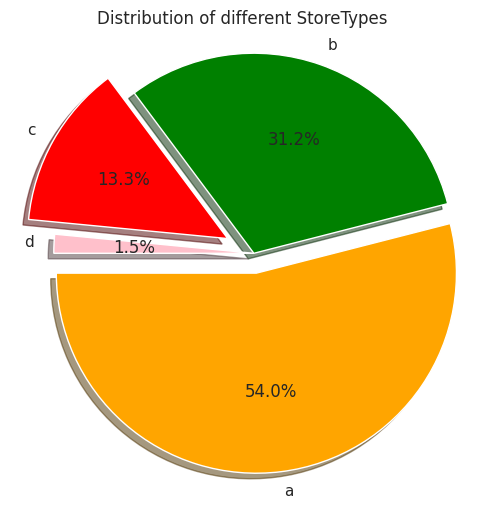

In [885]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_test.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

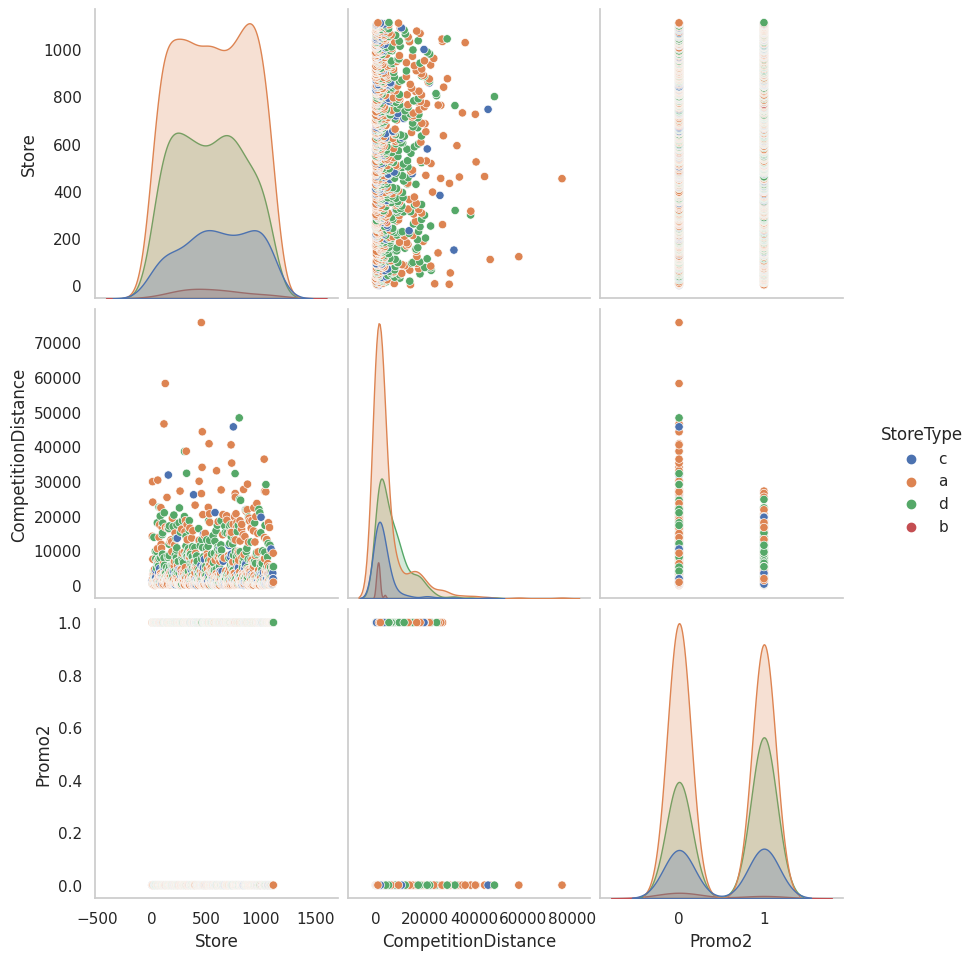

In [886]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_test,hue='StoreType')
pp.fig.set_size_inches(10,10);

Checking stores with their assortment type

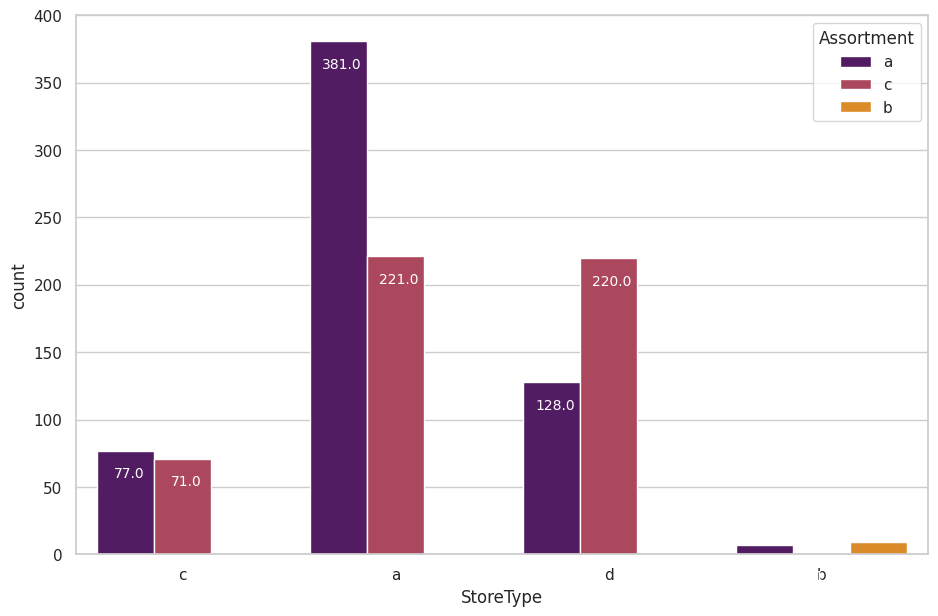

In [887]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_test,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

In [888]:
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


In [889]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


#Merge two dataset

In [890]:
store = pd.merge(store_train, store_test, how='left', on='Store')
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [891]:
store.shape

(1017209, 17)

#Eda on Merge dataset

##***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [892]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


<ipython-input-893-5f05e9d6abfa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(store.corr().abs(), annot=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

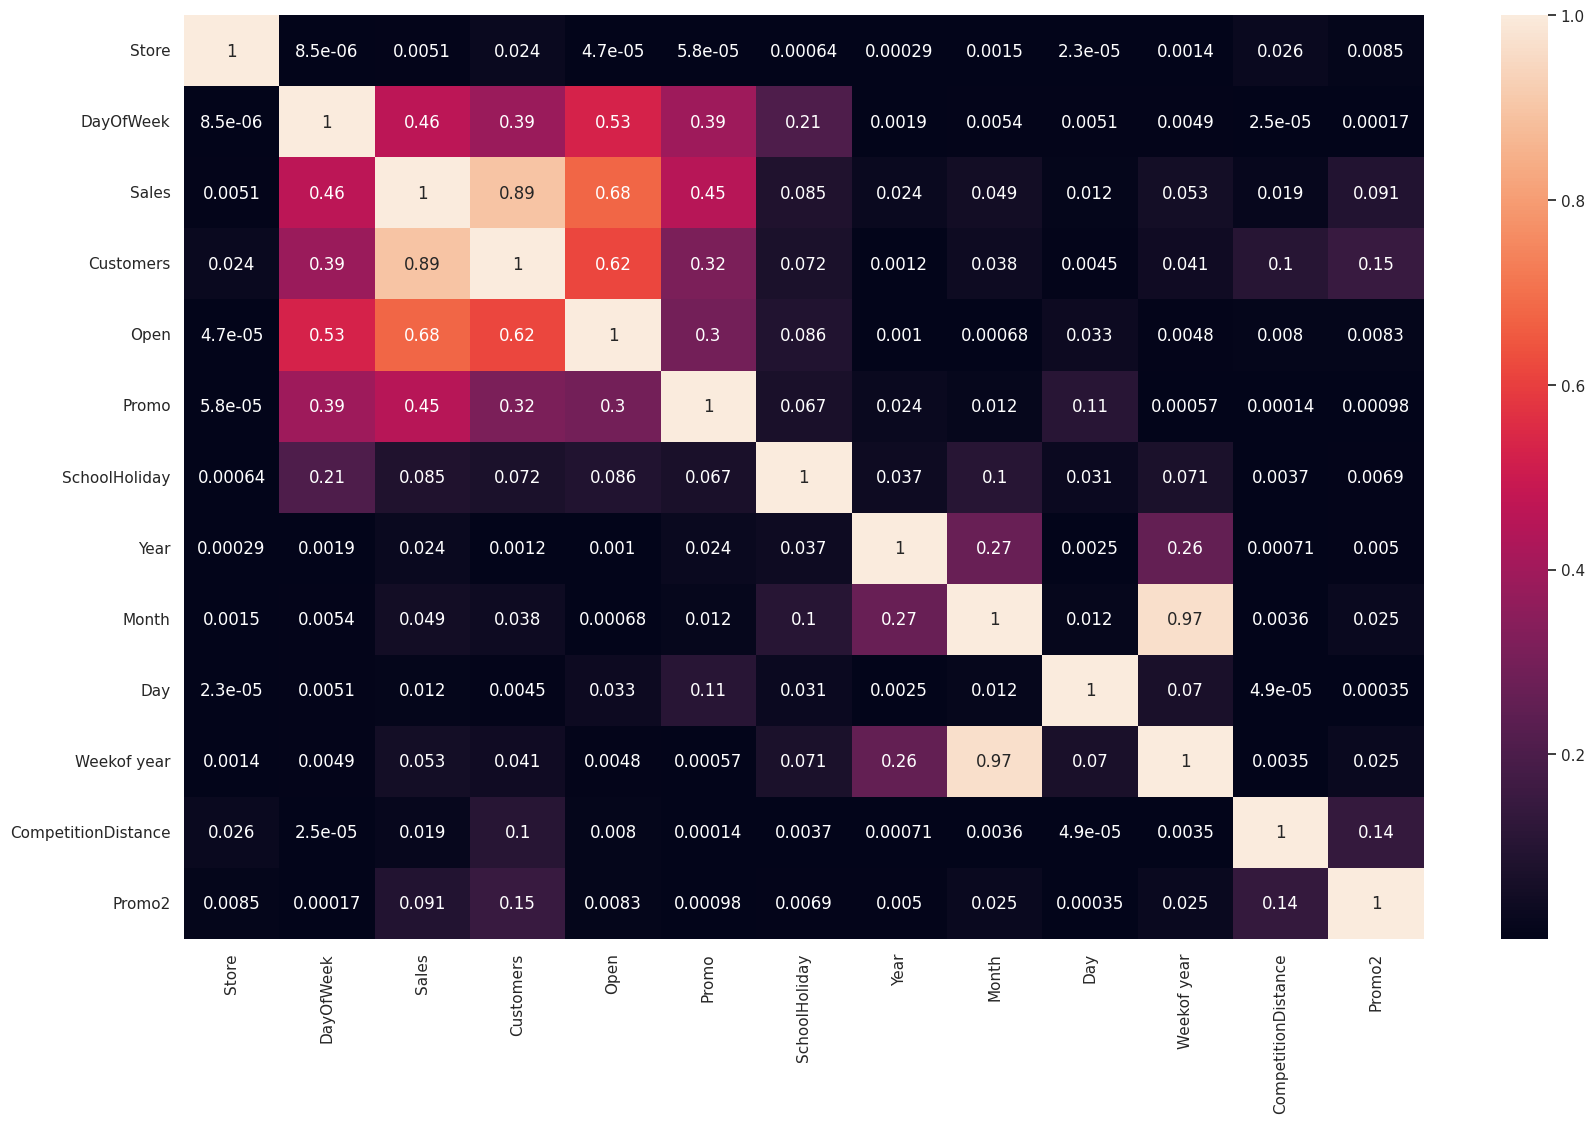

In [893]:
# Chart - 1 visualization code
plt.subplots(figsize=(20,12))
sns.heatmap(store.corr().abs(), annot=True)
plt.savefig("heatmap.png")

from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png

##### 1. Why did you pick the specific chart?

Answer Here.

Heatmap Of Merged Dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [894]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [895]:
# Chart - 2 visualization code
store["Avg_Customer_Sales"] = store.Sales/store.Customers

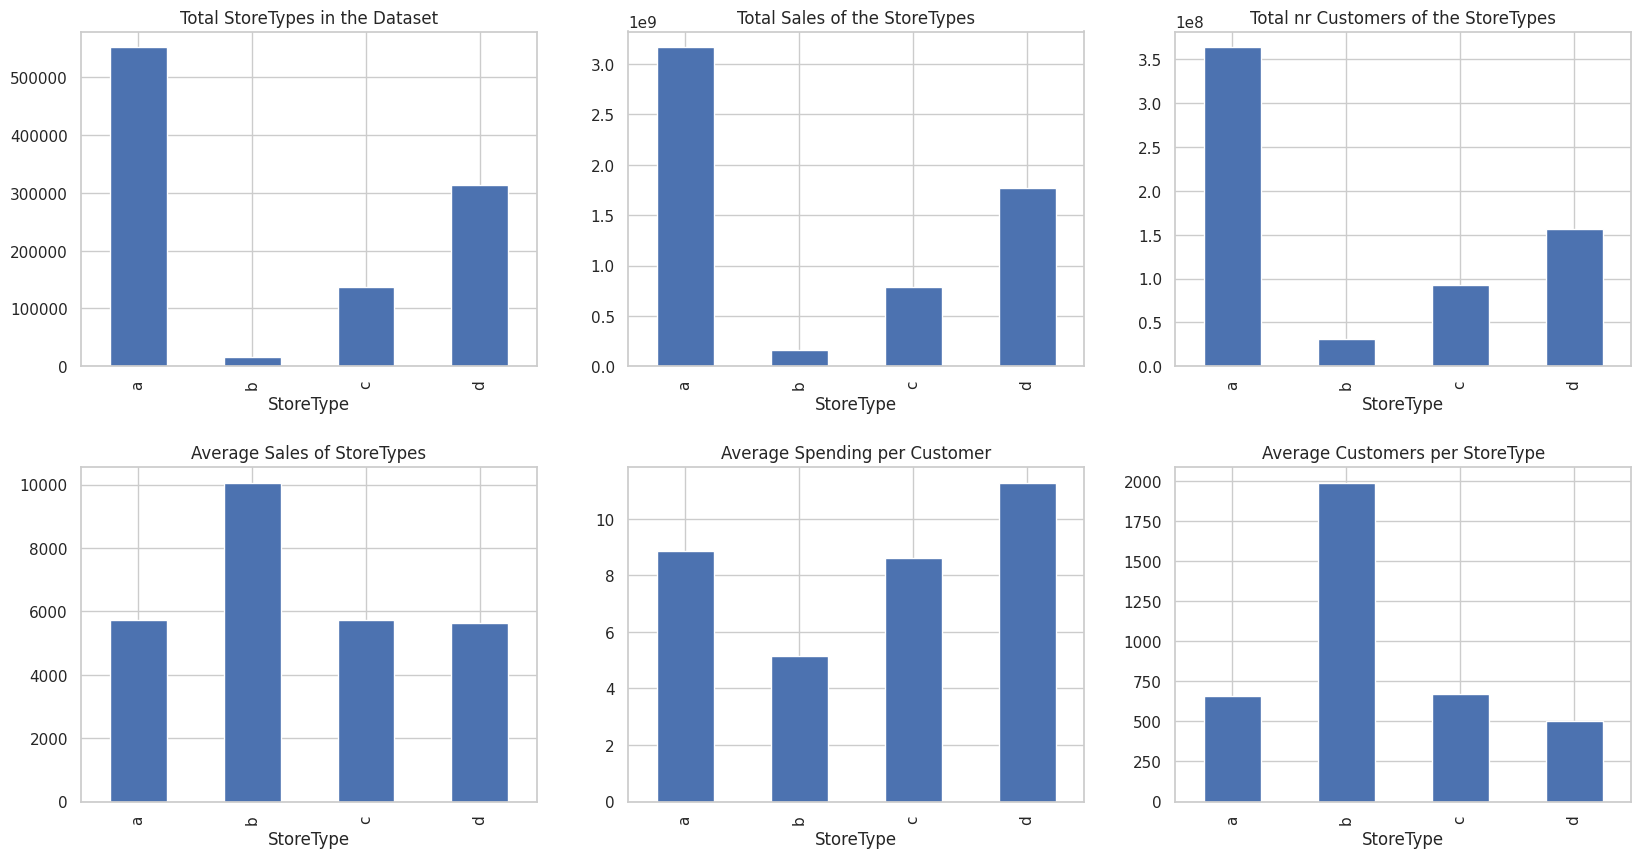

In [896]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
store.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

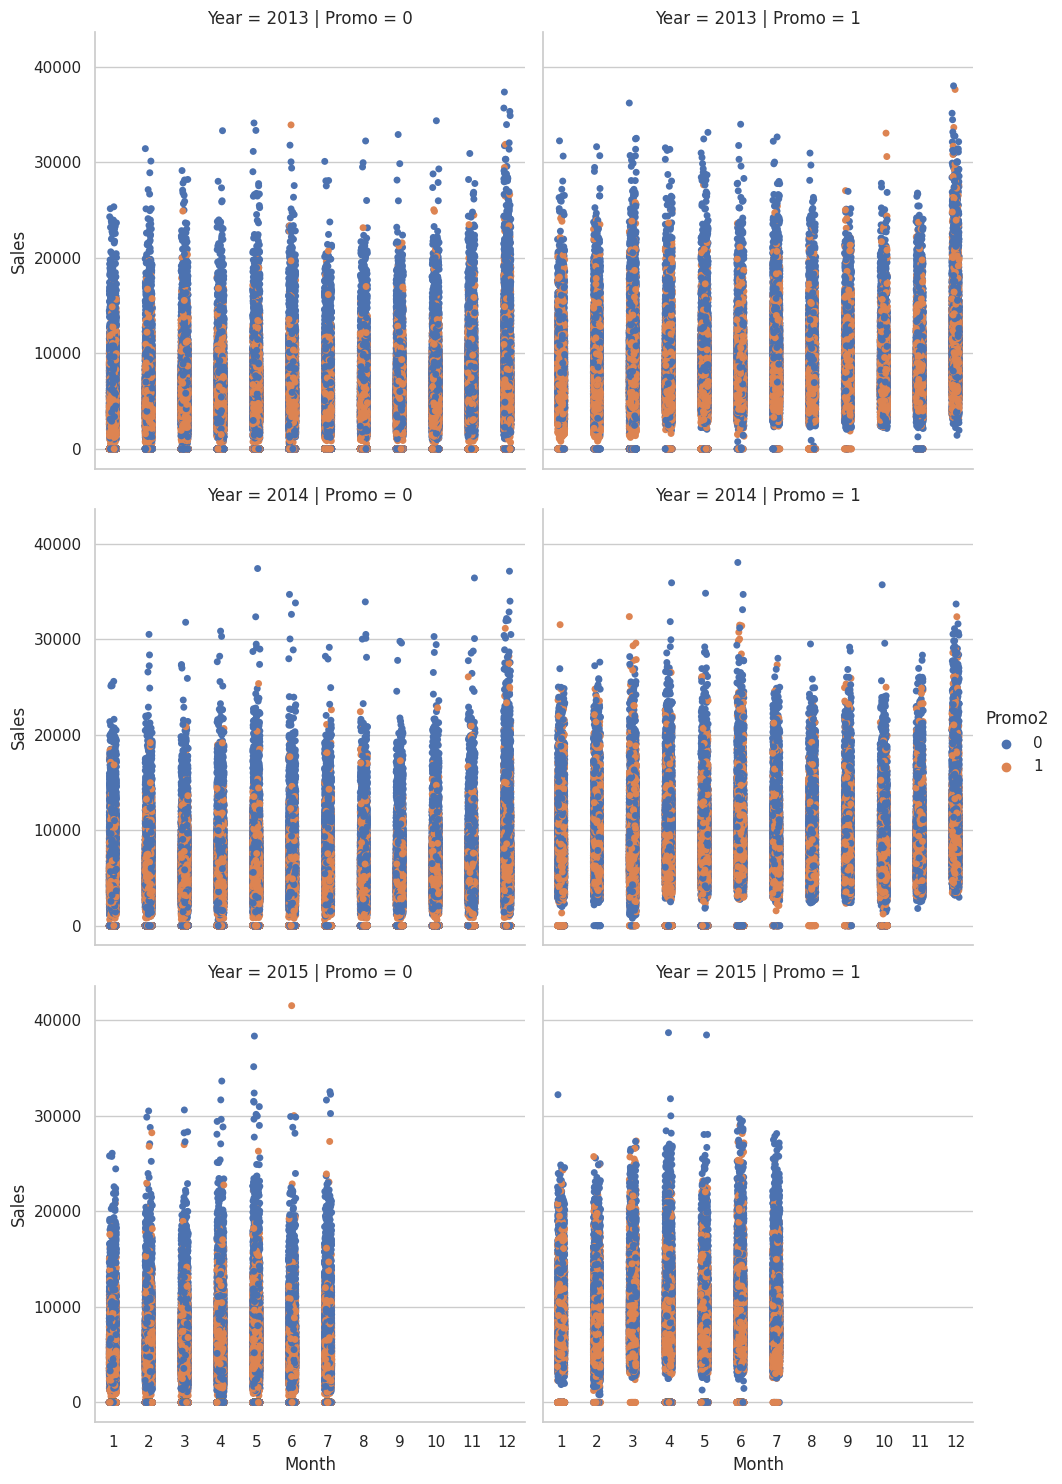

In [901]:
# Chart - 3 visualization code
sns.catplot(data = store, x ="Month", y = "Sales", col = 'Promo', hue = 'Promo2',row = "Year" )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 


##### 1. Why did you pick the specific chart?

Answer Here.

Lets go ahead with the promotions

##### 2. What is/are the insight(s) found from the chart?

Answer Here

As We can see that when the promo is running Sales are high

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


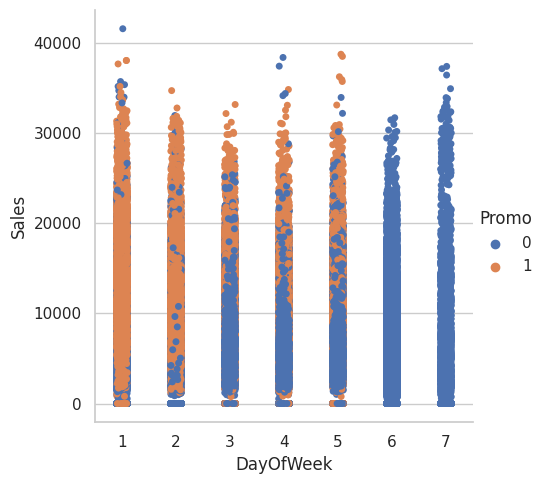

In [902]:
# Chart - 4 visualization code
sns.catplot(data = store, x = "DayOfWeek", y = "Sales", hue = "Promo")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", store[(store.Open == 1) & (store.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

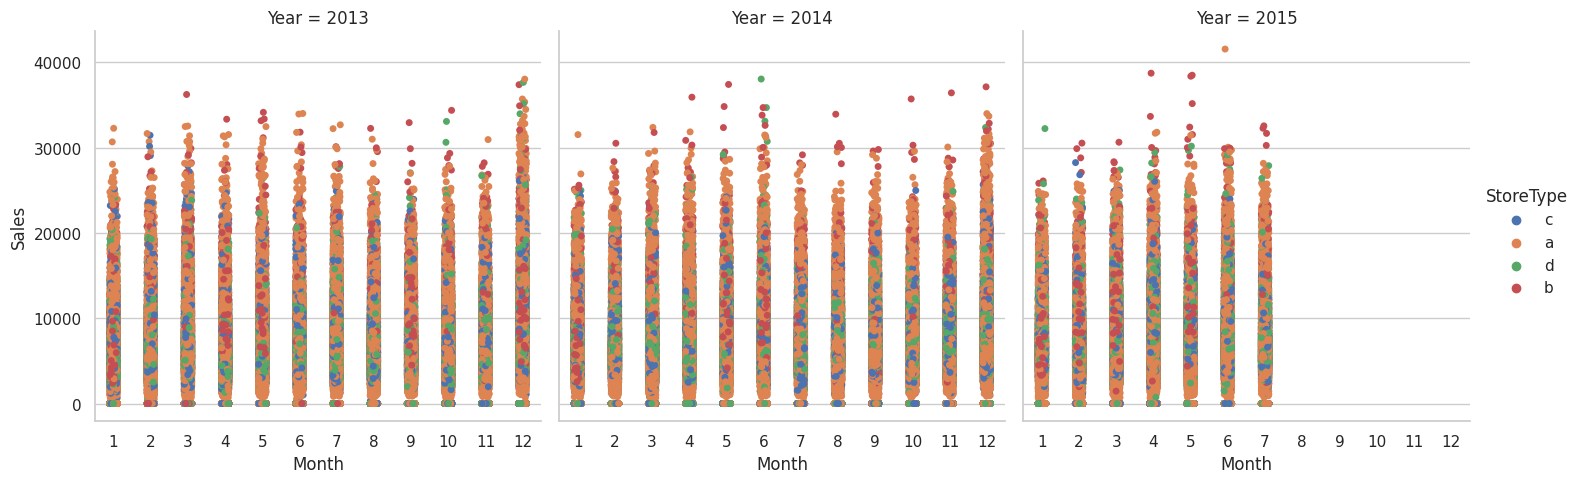

In [903]:
# Chart - 5 visualization code
sns.catplot(data = store, x = "Month", y = "Sales", col = "Year", hue = "StoreType")
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

##### 1. Why did you pick the specific chart?

Answer Here.

Let's see the trends on a yearly basis

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [904]:
# Chart - 6 visualization code
#What about the Competition Distance. What kind of inpact does this have on the sales.
store.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
store["CompetitionDistance_Cat"] = pd.cut(store["CompetitionDistance"], 5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

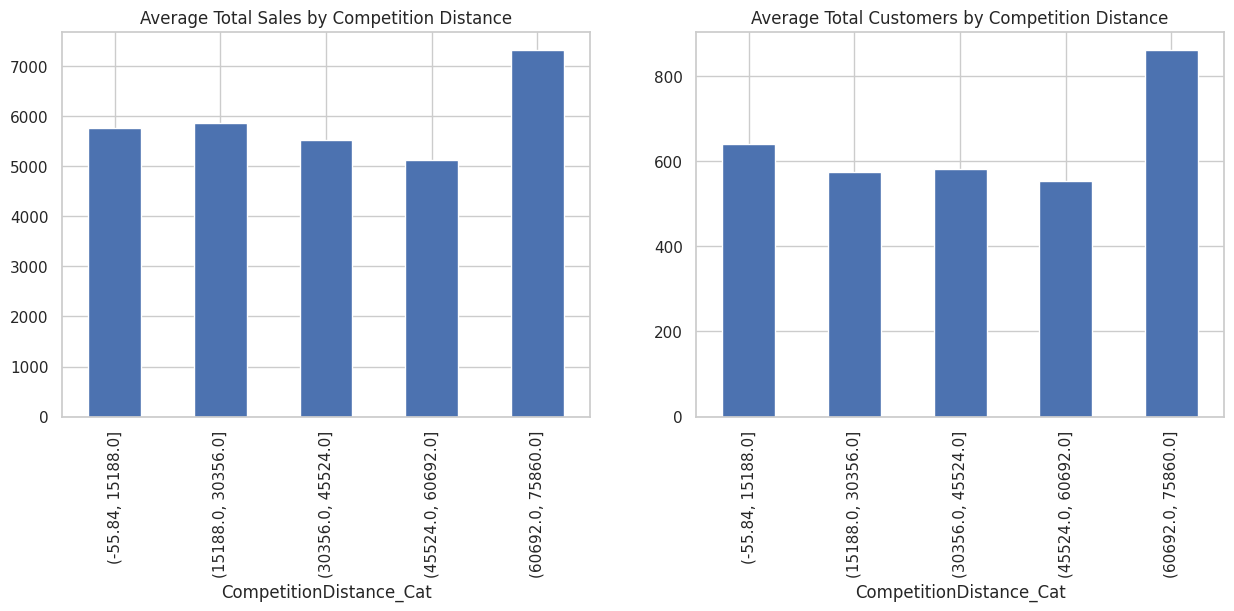

In [905]:
# Chart - 7 visualization code
f, ax = plt.subplots(1,2, figsize = (15,5))

store.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
store.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [932]:
store.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

KeyError: ignored

->Box plot shows that we have a very high outliers in sales

<Axes: >

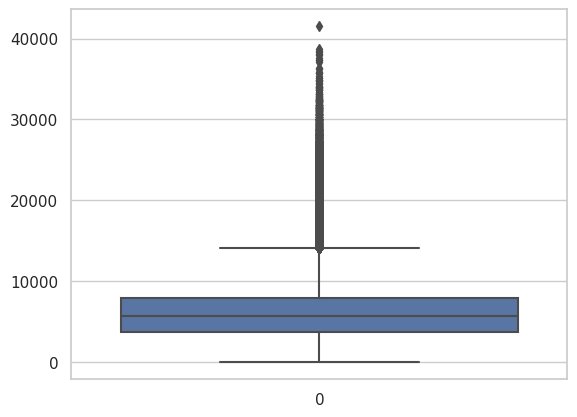

In [907]:
#checking outliers in sales
sns.boxplot(store_train['Sales'])

->Removing Outliers Of Sales Column

In [908]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [909]:
# defining new variable after removing outliers
store= remove_outlier(store, 'Sales')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Conclusion of the analysis:
Sales are highly correlated to number of Customers.

The most selling and crowded store type is A.

StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.

StoreTybe D had the highest buyer cart.

Promo runs only in weekdays.

For all stores, Promotion leads to increase in Sales and Customers both.

More stores are opened during School holidays than State holidays.

The stores which are opened during School Holiday have more sales than normal days.

Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.

Promo2 doesnt seems to be correlated to any significant change in the sales amount.

Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

####Drop Subsets Of Data Where Might Cause Bias

In [912]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
store = store[store.Open != 0]

In [913]:
# Open isn't a variable anymore, so we'll drop it too
store = store.drop('Open', axis=1)

In [914]:
# Check if there's any opened store with zero sales
store[store.Sales == 0]['Store'].sum()

31460

In [915]:
# see the percentage of open stored with zero sales
store[store.Sales == 0]['Sales'].sum()/store.Sales.sum()

0.0

In [916]:
# remove this part of data to avoid bias
store = store[store.Sales != 0]

In [917]:
store_new=store.copy()

In [918]:
store_new = pd.get_dummies(store_new,columns=['StoreType','Assortment'])

In [919]:
store_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Weekof year,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,...,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,...,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,...,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,...,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,...,31,29910.0,0,1,0,0,0,1,0,0


#### Chart - 8

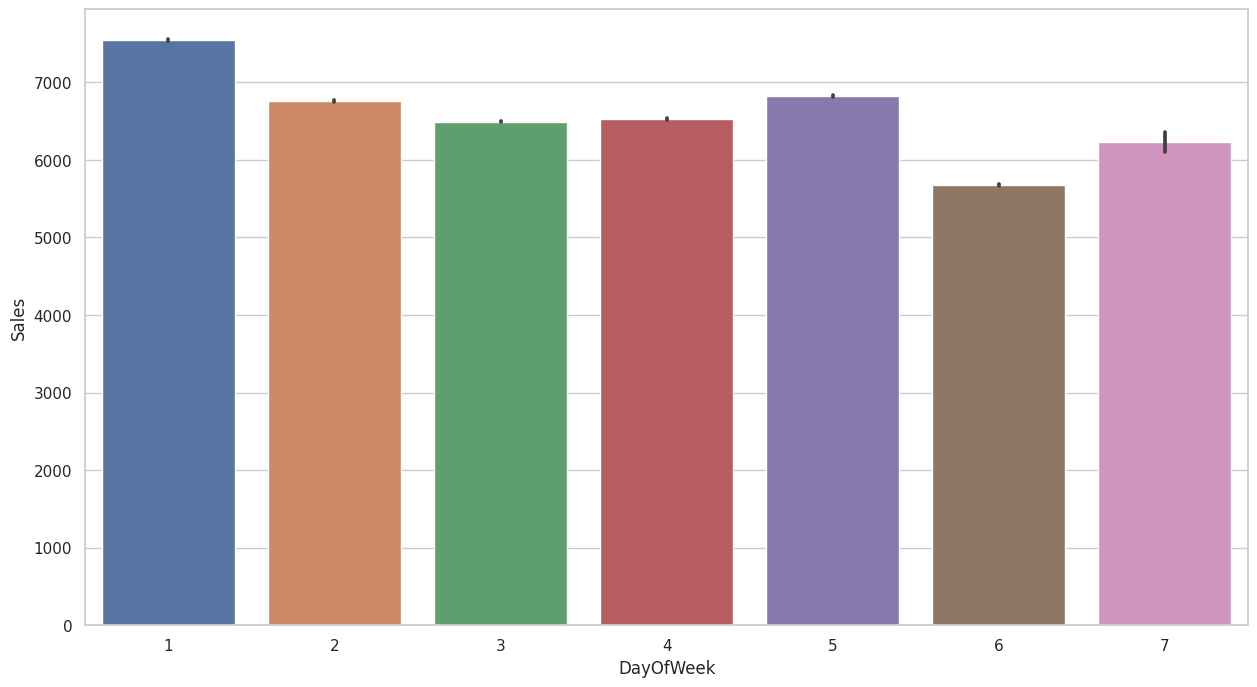

In [920]:
# Chart - 8 visualization code
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=store_new); 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From plot it can be sen that most of the sales have been on 1st and last day of week

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#Setting Features and Target Variables

In [921]:
X = store_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= store_new.Sales

In [922]:
X.shape

(817644, 17)

In [923]:
X.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Month,Day,Weekof year,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,0,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,0,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,0,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,0,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,0,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [924]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

####Splitting Dataset Into Training Set and Test Set

In [925]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [926]:
columns=X_train.columns

In [928]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572350 entries, 970857 to 380506
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            572350 non-null  int64  
 1   Customers            572350 non-null  int64  
 2   Promo                572350 non-null  int64  
 3   StateHoliday         572350 non-null  object 
 4   SchoolHoliday        572350 non-null  int64  
 5   Month                572350 non-null  int64  
 6   Day                  572350 non-null  int64  
 7   Weekof year          572350 non-null  int64  
 8   CompetitionDistance  572350 non-null  float64
 9   Promo2               572350 non-null  int64  
 10  StoreType_a          572350 non-null  uint8  
 11  StoreType_b          572350 non-null  uint8  
 12  StoreType_c          572350 non-null  uint8  
 13  StoreType_d          572350 non-null  uint8  
 14  Assortment_a         572350 non-null  uint8  
 15  Assortment_b

####Implementing Supervised Machine Learning algorithms.

1. Linear Regression (OLS)

In [936]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
regressor.intercept_

In [ ]:
regressor.coef_

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

####Inferences On Linear Regression Coefficients

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

Warnings:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The smallest eigenvalue is 1.15e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

2. LARS Lasso Regression

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

3. Decision Tree Regression

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)



In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

5. K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Feature Importance On Random Forest Regressor

As we can see that Random Forest has the highest test score

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])


Conclusion

In [ ]:
score_df

Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average

In [ ]:
# x=store_train
# y=store_test

In [ ]:
#  from sklearn.model_selection import train_test_split  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***